
# Deep Learning for Time Series Forecasting

Notes derived from Sofien Kaabar's Deep Learning for Finance codebook.

### Notions from Probability Theory and Statistics

This notebook presents a hands-on statistical exploration of Consumer Price Index (CPI) data—a critical macroeconomic indicator used to monitor inflation and the cost of living.

The primary goal is to apply fundamental statistical techniques to real-world data in order to build intuition for:

* Moments: Mean, Variance, Skewness, and Excess Kurtosis
* Quantiles: Median, Quartiles, and Interquartile Range
* Analytical Tools: Formulas and computations using NumPy, SciPy, and pandas
* Visualization Techniques: Histograms, boxplots, density plots, and annotated charts to highlight statistical features
  
CPI data provides an ideal canvas for such an analysis due to its:

* Long historical record
* Economic relevance
* Clear seasonal and trend components
  
This notebook is intended not just as a technical exercise, but also as an educational resource for learners aiming to connect abstract statistical definitions with practical economic phenomena. The insights gained here can lay the foundation for deeper work in econometrics, forecasting, and risk analysis.


In [2]:

import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as pdr

# Descriptive statistics is a representation of data since it summarizes its tendencies, behavior and trends. 

# Following are some examples of metrics used in trading, data analysis and descriptive statistics. 

# First we look at CPI, a time series from finance. 

start_date = '1950-01-01'
end_date = '2023-01-23'

cpi = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)

print(cpi.tail())

count_nan = cpi['CPIAUCSL'].isnull().sum()

print('Number of NaN values in the CPI dataframe: ' + str(count_nan))

# Transform CPI into a year-on-year measure

cpi = cpi.pct_change(periods = 12, axis = 0) * 100

# Drop all NaN values from the rows

cpi = cpi.dropna()



            CPIAUCSL
DATE                
2022-09-01   296.421
2022-10-01   297.979
2022-11-01   298.708
2022-12-01   298.808
2023-01-01   300.456
Number of NaN values in the CPI dataframe: 0


In [3]:

# CPI is a measure for the general trend of inflation in the united states. This measure makes 
# it easy to compare value of our currency against other countries and in different times. 




# Measures of Central Tendency

Central Tendency refers to the metrics whcih summarize the dataset into a value that can naively represent all values in the set. This is the mean: 

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i = \frac{1}{n} (x_1 + x_2 + ... + x_n) $$

We can apply this definition of mean to the CPI data. 

The mean of the dataset: 2.4945282480797544 %


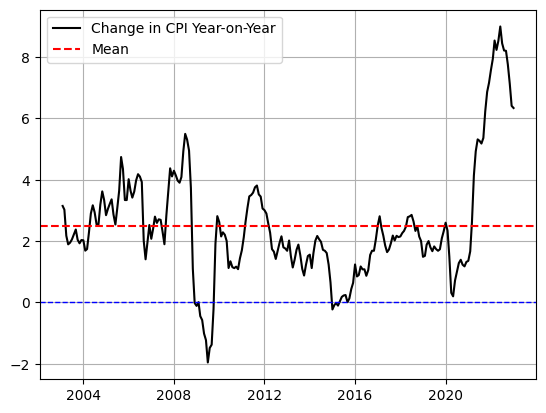

In [4]:

cpi_latest = cpi.iloc[-240:]

mean = cpi_latest["CPIAUCSL"].mean()

print('The mean of the dataset: ' + str(mean), '%')

plt.plot(cpi_latest[:], color = 'black', linewidth = 1.5,
        label = 'Change in CPI Year-on-Year')

plt.axhline(y = mean, color = 'red', linestyle = 'dashed',
            label = 'Mean')

plt.axhline(y = 0, color = 'blue', linestyle = 'dashed', linewidth = 1)
plt.grid()
plt.legend()


# Measures of Variability

Describe how spread-out the values are in a dataset relative to the central tendency measures. Variance is a well-known measure of variability in a dataset. 

Variance describes how far all the samples are from the mean; that's how well the mean represents the dataset altogether. 

Variance is determined quantitatively by: 

$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

This can be seen as the mean of all squared difference observations (squared deviations). 


In [5]:

# In terms of finance, CPI measures prices paid monthly by consumers for a selection of products and services. New observations
#    are posted to the public each month so that the series is time-continuous.

# Mean and median are variables in more complex models for forecasting financial time series. 


In [6]:

# Calculate the variance of recent CPI observations: 

variance = cpi_latest["CPIAUCSL"].var()

print("The variance of the dataset: " + str(variance) + ' %')



The variance of the dataset: 3.6316385985440123 %


In [7]:

# Standard deviation is a measure of variance with the same units as mean and median, i.e. units of the observations. 

# Calculate the variance of recent CPI observations: 

std_dev = cpi_latest["CPIAUCSL"].std()

print("The standard deviation of the dataset: " + str(std_dev) + ' %')



The standard deviation of the dataset: 1.9056858604040732 %


In [8]:

# Range of a dataset is the maximum value less the minimum value of the same dataset. 

# Calculating the range

range_metric = max(cpi["CPIAUCSL"]) - min(cpi["CPIAUCSL"])

print("The range of the dataset: " + str(range_metric) + ' %')

# Range is a quick glance at the two extremes in a dataset. 


The range of the dataset: 16.55103568187385 %


# Measures of Shape

Measures of Shape describe the distribution of the values around the central tendency measures in a dataset. 

Mean and Standard Deviation are the two quantities which determine the shape of any particular Gaussian distribution.

A plot of the standard normal distribution is shown below: 


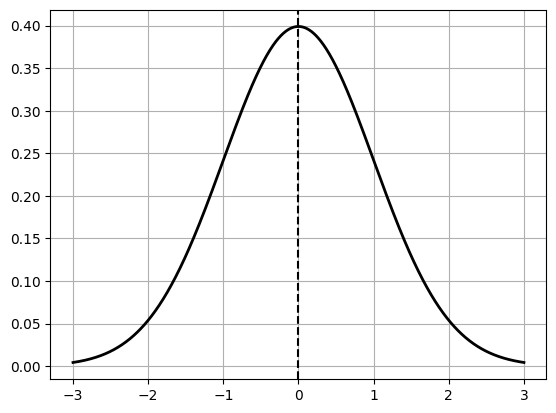

In [9]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

data = np.linspace(-3, 3, num = 1000)

mean = 0
std = 1

pdf = stats.norm.pdf(data, mean, std)

plt.plot(data, pdf, '-', color = 'black', lw = 2)
plt.axvline(mean, color = 'black', linestyle = '--')
plt.grid()
plt.show()


In [10]:

# Financial returns on investment are random and assumed to be normally distributed. Nonetheless they experience
#    kurtosis and skew, two measures of shape discussed in this section. 

# The skewness of a normal distribution is equal to zero. 

# Positive-valued skew gives the distribution a 'long tail' to the right. Mean is greater than median because mean is
#    sensitive to outliers. 

# Negative-valued skew indicates the dsitribution has a long tail to the left, which means that the mean is lower than
#    the median. 

# Mode is the greatest out of the two central tendency measures. 


In [11]:

# Skewness is quantified by moments of the distribution, for which skewed normals have third and fourth
#    'moments'. 

# Skewness measures this property as follows: 


$$ \tilde{\mu}_3 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^3}{N \sigma^3} $$

In [12]:

# Now we'll use this to find skewness of the US CPI year-on-year data since 2003: 

skew = cpi_latest["CPIAUCSL"].skew()

print("the skew of the dataset: " + str(skew))


the skew of the dataset: 1.17702126611868


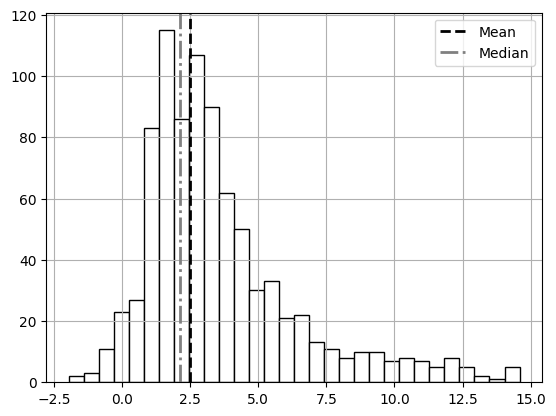

In [13]:

# To visualize the result, we'll plot a histogram of CPI (all urban comsumer, seasonally adjusted, long-term). 

median = cpi_latest["CPIAUCSL"].median()

mean = cpi_latest["CPIAUCSL"].mean()

fig, ax = plt.subplots()

ax.hist(cpi['CPIAUCSL'], bins = 30, edgecolor = 'black', color = 'white')

ax.axvline(mean, color = 'black', linestyle = '--', label = "Mean", linewidth = 2)

ax.axvline(median, color = 'grey', linestyle = '-.', label = "Median", linewidth = 2)

plt.grid()
plt.legend()
plt.show()


In [14]:

'''
    1. symmetrical: Mu_3 between -0.5 and 0.5
    2. mildly skewed: Mu_3 between -1.0 and -0.5 OR between 0.5 and 1.0
    3. highly skewed: less than -1.0 or greater than 1.0
'''

'\n    1. symmetrical: Mu_3 between -0.5 and 0.5\n    2. mildly skewed: Mu_3 between -1.0 and -0.5 OR between 0.5 and 1.0\n    3. highly skewed: less than -1.0 or greater than 1.0\n'

In [15]:

# Kurtosis is the fourth-order moment for probability distributions. 

# Kurtosis describes the tails, the peakedness or flatness, of a distribution relative to a normal distribution.



$$ k = \frac{\sum_{i = 1}{n}(x_i - \bar{x})^4}{N \sigma^4} $$


In [16]:

excess_kurtosis = cpi_latest['CPIAUCSL'].kurtosis()

print('The excess kurtosis of the dataset: ' + str(excess_kurtosis))


The excess kurtosis of the dataset: 2.168054557462154


In [17]:

# This means CPI for these parameters is leptokurtic, since 3 minus 2.17 is a quantity less than three. 


## Tests for Kurtosis

* Gaussian Distribution: $k = 3$, which is **mesokurtic**.
* **Leptokurtic** distribution has $k > 3$. Has higher peak and fatter tails than Gaussian.
* **Platykurtic** distribution has $k < 3$. Has flatter peak and thinner tails than Gaussian.

## Excess Kurtosis

This is kurtosis measured from zero rather than a distance from **mesokurtic** or normal kurtosis. 

# Understanding Inflation

Inflation is a decrease in purchasing power of the economic agents like households. Decrease in purchasing power means less is bought over time with the same amount of money. AKA general price increase. 

## Inflation

Associated with steady economic growth and expansion. Regulators monitor inflation to prevent social and economic distress. 

## Deflation

This is inflation in the decreasing direction. Deflation is dangerous for the economy, and it's a growth killer which causes extended economic gluts. Leads to unemployment and bearish stock markets. 

## Stagflation

High or increasing inflation with slowing economic growth. Unemployment remains high; worst-case scenario.

## Disinflation

Decrease in inflation in the positive territory. 3% to 2% year-to-year is called disinflation.

## Hyperinflation

Nightmarish scenario which occurs when inflation goes out of control. Astronomical percent changes, like percent changes in the millions year-to-year. Has happened in Zimbabwe, Yoogoslavio, and Greece. 



# Quantiles

Measures of shape and variability since they prvide information about the distribution of values and about the dispersion of those values (variability). Quartiles are the most common type of quantile. 

Quartiles divide the dataset into four equal parts. Arrange the data in order then perform splits. 

| Value | 
| ----- | 
| 1     | 
| 2     | 
| 4     | 
| 5     | 
| 7     | 
| 8     | 
| 9     | 

* Lower quartile (Q1) is the first quarter, and here it's 2.
* Middle quartile (Q2) is called the median, which is 5.
* Upper quartile (Q3) in this case is 8.

The equations here give the rankings of values, not the values themselves. 

$$ Q_1 = \left( \frac{n + 1}{4} \right) = 2  $$
$$ Q_3 = 3 \cdot \left( \frac{n + 1}{4} \right) = 8  $$
$$ Q_2 = \text{Median} = 5 $$


# Interquartile Range (IQR)

Differnece between Q3 and Q1, providing measure of spread around the middle 50% of data points. Robust to outliers and gives summary on the bulk of the samples. 

$$ IQR = Q_3 - Q_1 $$
$$ IQR = 8 - 2 = 6 $$

This is a valuable indicator and is used as an in m,cput or a risk metric in many different models. It's used to detect outliers since it's immune to them. Helps evaluate volatility of the analyzed dataset which is then used with other methods to create even more powerful models. 

IQR outperforms the range metric in terms of usefulness and interpretation since Range is prone to outliers.

Make sure to cacluate IQR in the same manner throughout your analysis. Above is the **Turkey's Hinges** method for calculating IQR. 


# Visualizing Data


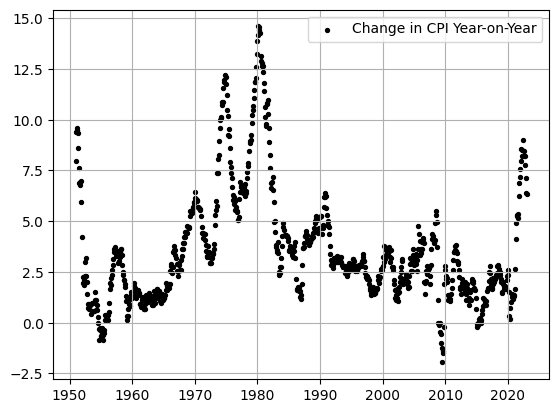

In [18]:

# Scatterplots 

import matplotlib.pyplot as plt 

cpi = cpi.reset_index()

fig, ax, = plt.subplots()
ax.scatter(cpi['DATE'], cpi['CPIAUCSL'], color = 'black', s = 8, label = 'Change in CPI Year-on-Year')

plt.grid()
plt.legend()
plt.show()


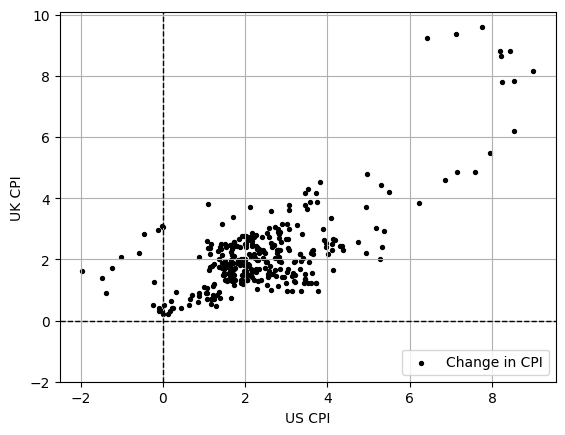

In [19]:

# Scatterplots are commonly used to compare datasets. 

start_date = '1995-01-01'
end_date = '2022-12-01'

cpi_us = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
cpi_uk = pdr.DataReader('GBRCPIALLMINMEI', 'fred', start_date, end_date)

cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.dropna()

cpi_us = cpi_us.pct_change(periods = 12, axis = 0) * 100
cpi_us = cpi_us.dropna()

cpi_uk = cpi_uk.pct_change(periods = 12, axis = 0) * 100
cpi_uk = cpi_uk.dropna()

fig, ax = plt.subplots()

ax.scatter(cpi_us['CPIAUCSL'], cpi_uk['GBRCPIALLMINMEI'], color = 'black', s = 8, label = 'Change in CPI')

ax.set_xlabel('US CPI')
ax.set_ylabel('UK CPI')

ax.axvline(x = 0, color = 'black', linestyle = 'dashed', linewidth = 1)
ax.axhline(y = 0, color = 'black', linestyle = 'dashed', linewidth = 1)
ax.set_ylim(-2, )
plt.grid()
plt.legend()
plt.show()


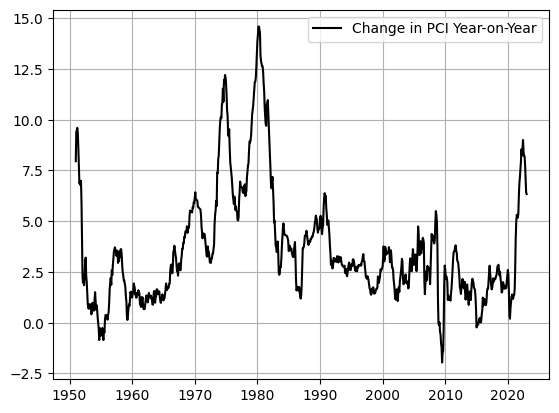

In [20]:

# Line plots are scatterplots that are joined and mostly charted against time axis. 

plt.plot(cpi['DATE'], cpi['CPIAUCSL'], color = 'black', label = 'Change in PCI Year-on-Year')
plt.grid()
plt.legend()
plt.show()


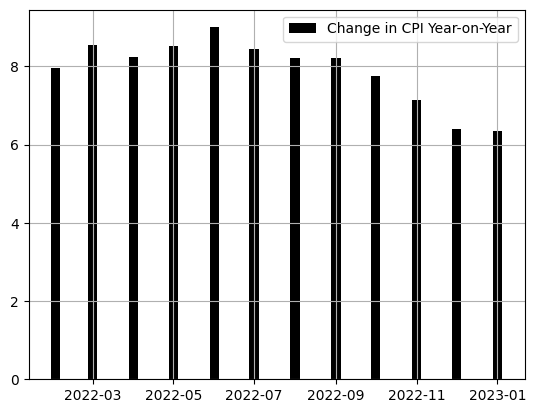

In [21]:

# Bar Plots display the distribution of variables by category or, here, in times.

cpi_one_year = cpi.iloc[-12:]
plt.bar(cpi_one_year['DATE'], cpi_one_year['CPIAUCSL'], color = 'black', label = 'Change in CPI Year-on-Year', width = 7)

plt.grid()
plt.legend()
plt.show()

# Bar plots are bad for continuous or large datasets. 


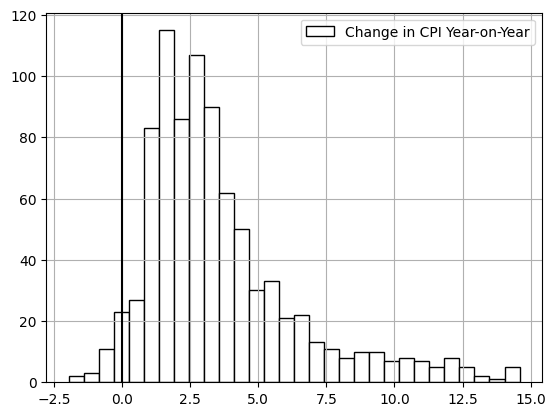

In [22]:

# Histograms can display large datasets and you will specify the number of regular partitions
#   on this plot. 

fig, ax = plt.subplots()
ax.hist(cpi['CPIAUCSL'], bins = 30, edgecolor = 'black', color = 'white', label = 'Change in CPI Year-on-Year')

ax.axvline(0, color = 'black')
plt.grid()
plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


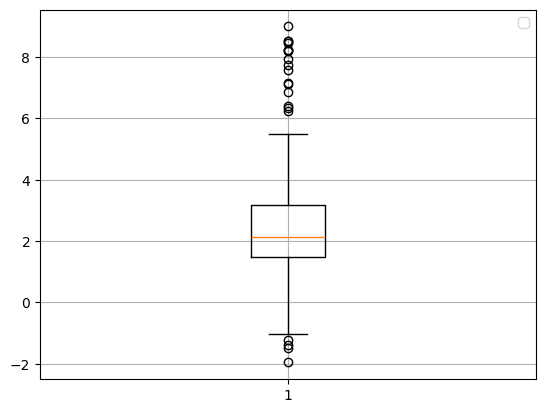

In [23]:

# Box-and-Whisker Plot including the median and quartiles. 

cpi_latest = cpi.iloc[-240:]
fig, ax = plt.subplots()
ax.boxplot(cpi_latest['CPIAUCSL'])

plt.grid()
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


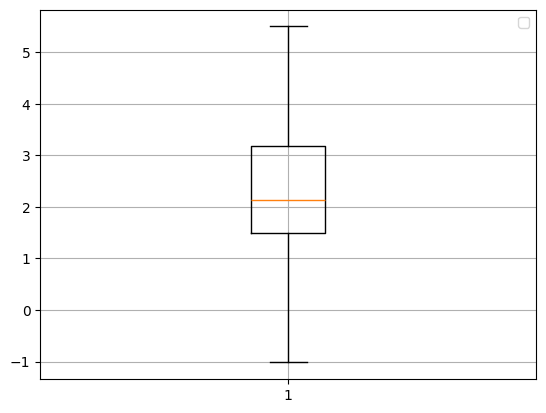

In [24]:

# Box-and-Whisker plot, excluding the outlier points

cpi_latest = cpi.iloc[-240:]
fig, ax = plt.subplots()
ax.boxplot(cpi_latest['CPIAUCSL'], showfliers = False)

plt.grid()
plt.legend()
plt.show()



In [25]:

# In handling financial time series, we're most likely to use line plots and candlestick patters. 


# Correlation

This is a measure used to measure the level of linear relationship between two random variables, like two different asset valuations throughout time. It's a number between -1.0 and 1.0. 

Some assets, like Microsoft and Apple, are naturally connected since they're in the same industry and they're affected by the same trends and economic events. 

## Covariance

$$ \text{cov}_{xy} = \frac{\sum^{i = 1}_{n}(x_i - \bar{x})(y_i - \bar{y})}{n} $$

## Pearson Method

$$ r_{xy} = \frac{\sum_{i = 1}^{n}(x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{\sum_{i = 1}^{n}(x_i - \bar{x})^2} \cdot \sqrt{\sum_{i = 1}^{n}(y_i - \bar{y})^2}} = \frac{ \text{cov}_{xy}}{\sigma_x \sigma_y}$$

## Spearman Method

Takes into account the order of values, rather than the actual values. This is a correlation of ranks instead of the actual values. 

$$ \rho = 1 - \frac{6 \cdot \sum_{i = 1}^{n} d_i^2}{n^3 - n} $$


In [26]:

# Pearson correlation for cpi data

import pandas_datareader as pdr
import pandas as pd

start_date = '1995-01-01'
end_date = '2022-12-01'

cpi_us = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
cpi_uk = pdr.DataReader('GBRCPIALLMINMEI', 'fred', start_date, end_date)

cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.dropna()

cpi_us = cpi_us.pct_change(periods = 12, axis = 0) * 100
cpi_us = cpi_us.dropna()

cpi_uk = cpi_uk.pct_change(periods = 12, axis = 0) * 100
cpi_uk = cpi_uk.dropna()

combined_cpi_data = pd.concat([cpi_us['CPIAUCSL'], 
                               cpi_uk['GBRCPIALLMINMEI']], axis = 1)

combined_cpi_data.corr(method = 'pearson')



,CPIAUCSL,GBRCPIALLMINMEI
CPIAUCSL,1.000000,0.732048
GBRCPIALLMINMEI,0.732048,1.000000



# MetaTrader5


In [27]:

import datetime
import pytz
import pandas as pd
import numpy as np
from tradingview_ta import TA_Handler, Interval


In [28]:

now = datetime.datetime.now()


In [29]:
assets = ['EURUSD', 'USDCHF', 'GBPUSD', 'USDCAD']

def get_quotes(time_frame, year = 2005, month = 1, day = 1, 
               asset = "EURUSD"):
    if not mt5.initialize():   
        print("initialize() failed, error code =", mt5.last_error())
        quit()
    timezone = pytz.timezone("Europe/Paris")
    time_from = datetime.datetime(year, month, day, tzinfo = timezone)   
    time_to = datetime.datetime.now(timezone) + datetime.timedelta(days=1)
    rates = mt5.copy_rates_range(asset, time_frame, time_from, time_to)
    rates_frame = pd.DataFrame(rates)
    return rates_frame

def mass_import(asset, time_frame):               
    if time_frame == 'H1':
        data = get_quotes(frame_H1, 2013, 1, 1, asset = assets[asset])
        data = data.iloc[:, 1:5].values
        data = data.round(decimals = 5)           
    return data 